In [1]:
# import
import os
import glob
from satfunc import *
from shapefunctions import *
import glob


In [3]:
# Extract values within plots from images
# test cultural vs natural
# input
site = 'iffiartafik'
sensor = 'sequoia'
folder = 'channel'
all_touched = True
print_p = True

results_natural,results_cultural,pList = extract_plot_values(site, sensor, folder, all_touched, print_p)

nir

	t = -3.199  	p = 0.022 	n = 6 	significant
rededge

	t = -3.067  	p = 0.026 	n = 6 	significant
green

	t = -3.293  	p = 0.018 	n = 6 	significant
red

	t = -3.413  	p = 0.009 	n = 6 	significant


In [ ]:
channelList = ['green','red','rededge','nir']
print 'Natural'
for channel in channelList:
    print channel
    for num in results_natural[channel]:
        print num

print 'Cultural'
for channel in channelList:
    print channel
    for num in results_cultural[channel]:
        print num

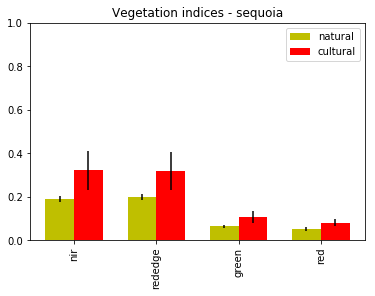

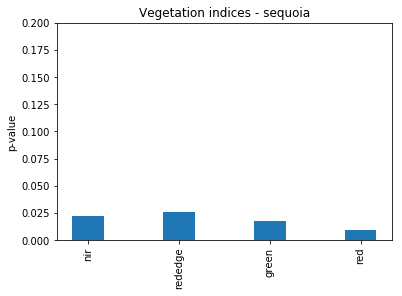

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = len(results_natural)
label = []
mean_natural = []
std_natural = []
mean_cultural = []
std_cultural = []

for key in results_natural:
    label.append(key)
    mean_natural.append(np.mean(results_natural[key]))
    std_natural.append(np.std(results_natural[key]))
for key in results_cultural:
    mean_cultural.append(np.mean(results_cultural[key]))
    std_cultural.append(np.std(results_cultural[key]))

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, mean_natural, width, color='y', yerr=std_natural)
rects2 = ax.bar(ind + width, mean_cultural, width, color='r', yerr=std_cultural)

# add some text for labels, title and axes ticks
if folder=='channel2':
    ax.set_ylabel('reflection')
    ax.set_title('Color channels - ' + sensor + ' - ' + site)
else:
    ax.set_title('Vegetation indices - ' + sensor)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(label, rotation='vertical')
ax.set_ylim(0,1)

ax.legend((rects1[0], rects2[0]), ('natural', 'cultural'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
#autolabel(rects1)
#autolabel(rects2)

fig2, ax2 = plt.subplots()
ax2.bar(ind, pList, width)
ax2.set_xticks(ind)
ax2.set_xticklabels(label, rotation='vertical')
ax2.set_ylabel('p-value')
ax2.set_title('Vegetation indices - ' + sensor)
ax2.set_ylim(0,0.2)
#plt.savefig('/Volumes/RASMUS_1/Satellite/analysis/figures/ersaa_'+sensor+'.png')
plt.show()

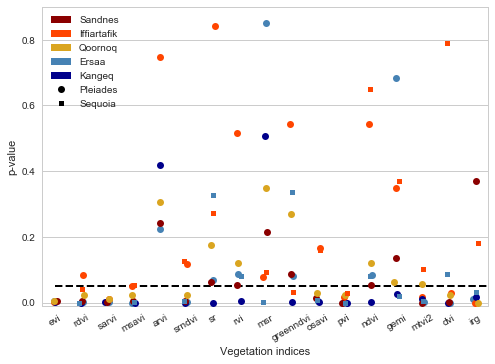

In [6]:
# Extract values within plots from images
# test cultural vs natural

# input
siteListPleiades = ['ersaa', 'iffiartafik', 'kangeq', 'sandnes', 'qoornoq']
#siteListSequoia = ['ersaa', 'iffiartafik', 'sandnes', 'qoornoq']
siteListSequoia = ['ersaa', 'iffiartafik']
siteListS2 = ['sandnes']
#sensor = 'pleiades'
folder = 'VI'
all_touched = True
print_p = False

import pandas as pd
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

cDict = {'sandnes': 'darkred',
         'iffiartafik': 'orangered',
         'qoornoq': 'goldenrod',
         'ersaa': 'steelblue',
         'kangeq': 'darkblue'}

label = []
runFirst = True
for site in siteListPleiades:
    results_natural,results_cultural,pList = extract_plot_values(site, 'pleiades', folder, all_touched, print_p)
    if runFirst:
        for key in results_natural:
            label.append(key)
        runFirst = False
    df = pd.DataFrame()
    df['Vegetation indices'] = label
    df['p-value'] = pList
    palette = colors.cnames[cDict[site]]
    g = sns.stripplot(x="Vegetation indices", y="p-value", data=df, color=palette, s=7, jitter=True);

    
for site in siteListSequoia:
    pListSort = []
    results_natural,results_cultural,pList = extract_plot_values(site, 'sequoia', folder, all_touched, print_p)
    counter = 0
    for l in label:
        found = False
        for key in results_natural:
            if key == l:
                pListSort.append(pList[counter])
                found = True
                counter += 1
        if found == False:
            pListSort.append(1)
    df = pd.DataFrame()
    df['Vegetation indices'] = label
    df['p-value'] = pListSort
    palette = colors.cnames[cDict[site]]
    g = sns.stripplot(x="Vegetation indices", y="p-value", data=df, color=palette, marker='s', s=5, jitter=True);

g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set(ylim=(-0.01, 0.9))
# make legend
legend_elements = [Patch(facecolor=cDict['sandnes'], label='Sandnes'),
                   Patch(facecolor=cDict['iffiartafik'], label='Iffiartafik'),
                   Patch(facecolor=cDict['qoornoq'], label='Qoornoq'),
                   Patch(facecolor=cDict['ersaa'], label='Ersaa'),
                   Patch(facecolor=cDict['kangeq'], label='Kangeq'),
                   Line2D([0], [0], marker='o', color='w', label='Pleiades', markerfacecolor='black', markersize=7),
                   Line2D([0], [0], marker='s', color='w', label='Sequoia', markerfacecolor='black', markersize=5)]

plt.legend(handles = legend_elements)
plt.plot([0, len(label)], [0.05, 0.05], linewidth=2, color='black', ls='--')

#plt.savefig('/Users/rasmus/Google Drive/Phd/Skrivning/paper 1/figures/VI_t_test', dpi=300)
